In [ ]:
pip install pystan==2.19.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 MB 11.8 MB/s eta 0:00:00
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0


In [ ]:
pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9536639 sha256=0ead6b94919701067db1a344a8e31f1dccbc3323eb947fe5b4ddfb27e85949d8
  Stored in directory: /root/.cache/pip/wheels/d0/d2/ae/c579b7fd160999d35908f3cb8ebcad7ef64ecaca7b78e4c3c8
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
prophet 1.1.1 requires cmdstanpy>=1.0.4, but you have cmdstanpy 0.9.5 which is incompatible.


In [ ]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from fbprophet import Prophet
import prophet

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Tanjiaalam/carbon/main/data_cleanednew.csv')



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['co2_per_cap_scaled'] = scaler.fit_transform(df['co2_per_cap'].values.reshape(-1,1))

In [ ]:
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              1700 non-null   object 
 1   year                 1700 non-null   object 
 2   cereal_yield         1700 non-null   float64
 3   fdi_perc_gdp         1700 non-null   float64
 4   en_per_gdp           1700 non-null   float64
 5   en_per_cap           1700 non-null   float64
 6   co2_ttl              1700 non-null   float64
 7   co2_per_gdp          1700 non-null   float64
 8   pop_urb_aggl_perc    1700 non-null   float64
 9   prot_area_perc       1700 non-null   float64
 10  gdp                  1700 non-null   float64
 11  gni_per_cap          1700 non-null   float64
 12  under_5_mort_rate    1700 non-null   float64
 13  pop_growth_perc      1700 non-null   float64
 14  pop                  1700 non-null   float64
 15  urb_pop_growth_perc  1700 non-null   f

In [ ]:
df.country.unique()

array(['AGO', 'ARE', 'ARG', 'AUS', 'AUT', 'BGD', 'BGR', 'BOL', 'BRA',
       'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COG', 'COL', 'CRI',
       'DEU', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'EMU', 'ESP', 'FIN',
       'FRA', 'GBR', 'GHA', 'GRC', 'GTM', 'HND', 'HUN', 'IDN', 'IND',
       'IRL', 'ISR', 'ITA', 'JOR', 'JPN', 'KEN', 'KOR', 'LAC', 'LIC',
       'LMC', 'LMY', 'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS', 'NGA',
       'NLD', 'NZL', 'PAK', 'PAN', 'PER', 'PHL', 'PRT', 'PRY', 'ROM',
       'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR', 'TGO',
       'THA', 'TUR', 'TZA', 'UMC', 'URY', 'USA', 'VEN', 'VNM', 'WLD',
       'ZAF', 'ZAR', 'ZMB', 'ARM', 'BLR', 'ECA', 'POL', 'RUS', 'UKR',
       'UZB', 'YEM', 'CZE', 'ETH', 'KAZ', 'IRN'], dtype=object)

In [ ]:
melb = df[df['country']== 'KOR']
melb['year'] = pd.to_datetime(melb['year'])
melb.tail()

<ipython-input-12-1b3b007255b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  melb['year'] = pd.to_datetime(melb['year'])


,country,year,cereal_yield,fdi_perc_gdp,en_per_gdp,en_per_cap,co2_ttl,co2_per_gdp,pop_urb_aggl_perc,prot_area_perc,gdp,gni_per_cap,under_5_mort_rate,pop_growth_perc,pop,urb_pop_growth_perc,urb_pop,co2_per_cap,co2_per_cap_scaled
1275,KOR,2004-01-01,6496.6,1.280681,197.350441,4334.049460,482276.506,457.137012,48.429270,2.397595,7.220000e+11,14830.0,5.4,0.375399,48039000.0,0.673759,38700218.4,10.039270,0.269974
1370,KOR,2005-01-01,6376.1,0.746689,191.569419,4364.577797,462918.413,422.085424,48.373588,2.397595,8.450000e+11,16900.0,5.3,0.205870,48138000.0,0.503342,38895504.0,9.616486,0.258571
1464,KOR,2006-01-01,6401.4,0.376812,185.103220,4421.052322,470820.798,408.153760,48.260287,2.397595,9.520000e+11,18950.0,5.2,0.329756,48297000.0,0.601663,39130229.4,9.748448,0.262131
1559,KOR,2007-01-01,6109.3,0.170067,183.223330,4584.498452,498205.954,410.913392,48.154303,2.397595,1.050000e+12,21200.0,5.1,0.328672,48456000.0,0.599842,39365654.4,10.281615,0.276511
1654,KOR,2008-01-01,7072.8,0.355453,182.976758,4669.006398,509170.284,410.521297,48.066295,2.397595,9.310000e+11,21580.0,5.1,0.311138,48607000.0,0.581575,39595262.2,10.475246,0.281733


In [ ]:
melb.dtypes

country                        object
year                   datetime64[ns]
cereal_yield                  float64
fdi_perc_gdp                  float64
en_per_gdp                    float64
en_per_cap                    float64
co2_ttl                       float64
co2_per_gdp                   float64
pop_urb_aggl_perc             float64
prot_area_perc                float64
gdp                           float64
gni_per_cap                   float64
under_5_mort_rate             float64
pop_growth_perc               float64
pop                           float64
urb_pop_growth_perc           float64
urb_pop                       float64
co2_per_cap                   float64
co2_per_cap_scaled            float64
dtype: object

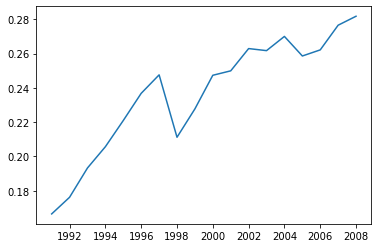

In [ ]:
from matplotlib import pyplot as plt
plt.plot(melb['year'], melb['co2_per_cap_scaled'])
plt.show()

In [ ]:
data = melb[['year', 'co2_per_cap_scaled']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,ds,y
42,1991-01-01,0.166532
129,1992-01-01,0.176222
223,1993-01-01,0.193325
317,1994-01-01,0.205708
412,1995-01-01,0.220977


In [ ]:
!pip install neuralprophet
from neuralprophet import NeuralProphet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.0/115.0 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.5/706.5 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 KB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 KB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 KB 4.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.1/185.1 KB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
m = NeuralProphet(n_lags=5, n_forecasts=3)
metrics_train = m.fit(df=data, freq="Y")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 94.444% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 94.444% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with dai

Finding best initial lr:   0%|          | 0/201 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
forecast = m.predict(data)

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 94.444% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 94.444% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 95.238% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 95.238% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS


Predicting: 1it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


In [ ]:
df_fc = m.get_latest_forecast(forecast)
df_fc.head(3)

,ds,y,origin-0
0,2006-01-01,0.262131,0.267512
1,2007-01-01,0.276511,0.270422
2,2008-01-01,0.281733,0.291580


In [ ]:
future=m.make_future_dataframe(data)
forecast=m.predict(future)
print(forecast)


INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 94.444% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 94.444% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 87.5% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 87.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 87.5% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 87.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency 

Predicting: 1it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


          ds         y     yhat1     yhat2     yhat3       ar1       ar2  \
0 2004-01-01  0.269974       NaN       NaN       NaN       NaN       NaN   
1 2005-01-01  0.258571       NaN       NaN       NaN       NaN       NaN   
2 2006-01-01  0.262131       NaN       NaN       NaN       NaN       NaN   
3 2007-01-01  0.276511       NaN       NaN       NaN       NaN       NaN   
4 2008-01-01  0.281733       NaN       NaN       NaN       NaN       NaN   
5 2009-01-01       NaN  0.279265       NaN       NaN -0.030038       NaN   
6 2010-01-01       NaN       NaN  0.273213       NaN       NaN -0.042889   
7 2011-01-01       NaN       NaN       NaN  0.273904       NaN       NaN   

        ar3     trend  season_yearly  
0       NaN       NaN            NaN  
1       NaN       NaN            NaN  
2       NaN       NaN            NaN  
3       NaN       NaN            NaN  
4       NaN       NaN            NaN  
5       NaN  0.248584       0.060719  
6       NaN  0.252056       0.064046  
7 -

In [ ]:
forecast = m.predict(future, raw=True, decompose=False)
forecast.tail()

WARNING - (NP.forecaster.predict) - Raw forecasts are incompatible with plotting utilities
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 87.5% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 87.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 87.5% of the data.
INFO:NP.df_utils:Major frequency YS corresponds to 87.5% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO:NP.df_utils:Defined frequency is equal to major frequency - YS


Predicting: 1it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,step0,step1,step2
0,2009-01-01,0.279265,0.273213,0.273904
